# Importing the libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Data Loading

In [2]:
df = pd.read_csv("../data/load_data.csv")

In [3]:
df.head()

Date_Time  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01-01-2018 00:15   8.753692                                  2.95   
1  01-01-2018 00:30   4.000000                                  4.46   
2  01-01-2018 00:45   3.240000                                  3.28   
3  01-01-2018 01:00   3.310000                                  3.56   
4  01-01-2018 01:15   3.820000                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor          NSM  \
0                     73.210000                         100.0   900.000000   
1                     66.770000                         100.0  1800.000000   
2                     70.280000                         100.0  8070.880991   
3                     68.090000                         100.0  3600.000000   
4                    133.655666                           NaN  4500.000000   

    Load_Type  
0  Light_Load  
1  Light_Load  
2  Light_Load  
3  Light_Load  
4  Light_Load

# Basic preprocessing

In [4]:
df.shape

(35041, 9)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Date_Time                                  0
Usage_kWh                               1559
Lagging_Current_Reactive.Power_kVarh     876
Leading_Current_Reactive_Power_kVarh    1156
CO2(tCO2)                                455
Lagging_Current_Power_Factor             350
Leading_Current_Power_Factor            1471
NSM                                      455
Load_Type                                  0
dtype: int64

In [7]:
df.iloc[:, 1:-1] = df.iloc[:, 1:-1].fillna(df.iloc[:, 1:-1].median())

In [8]:
df.isnull().sum()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
Load_Type                               0
dtype: int64

# Exploratory Data Analysis

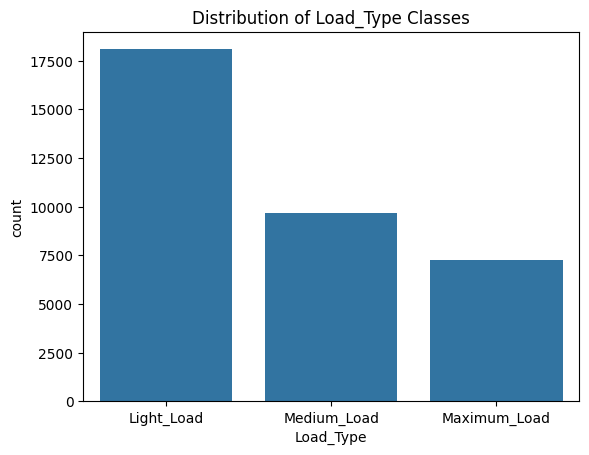

In [9]:
sns.countplot(data=df, x='Load_Type')
plt.title('Distribution of Load_Type Classes')
plt.show()

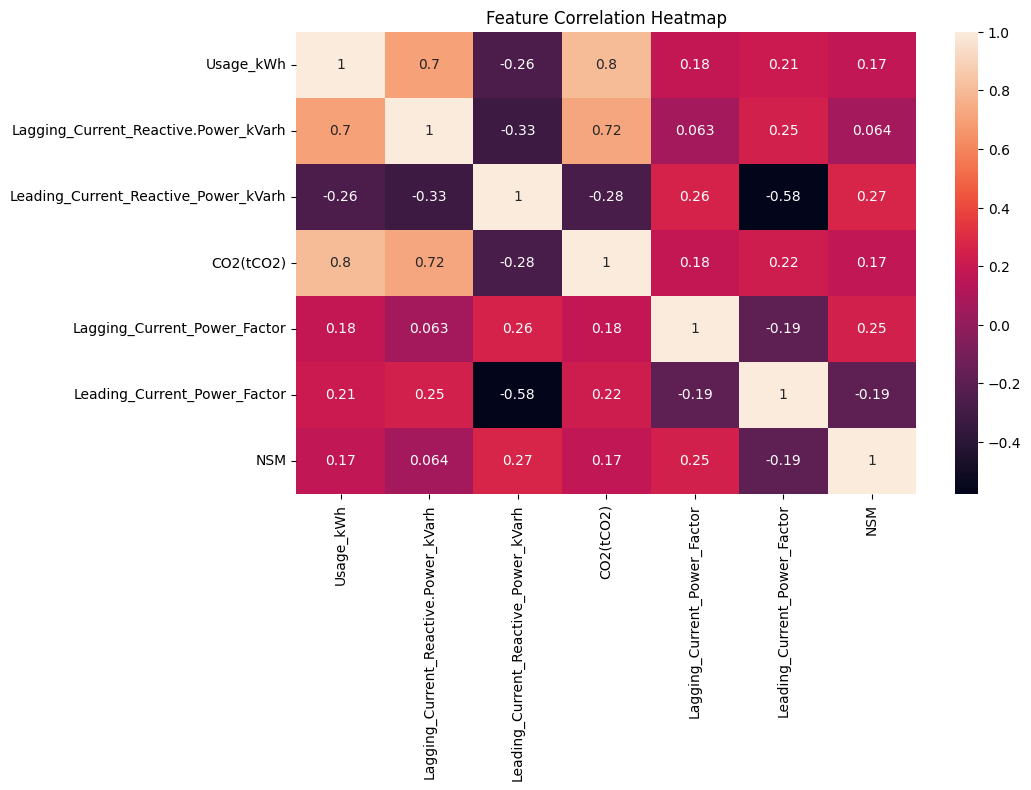

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

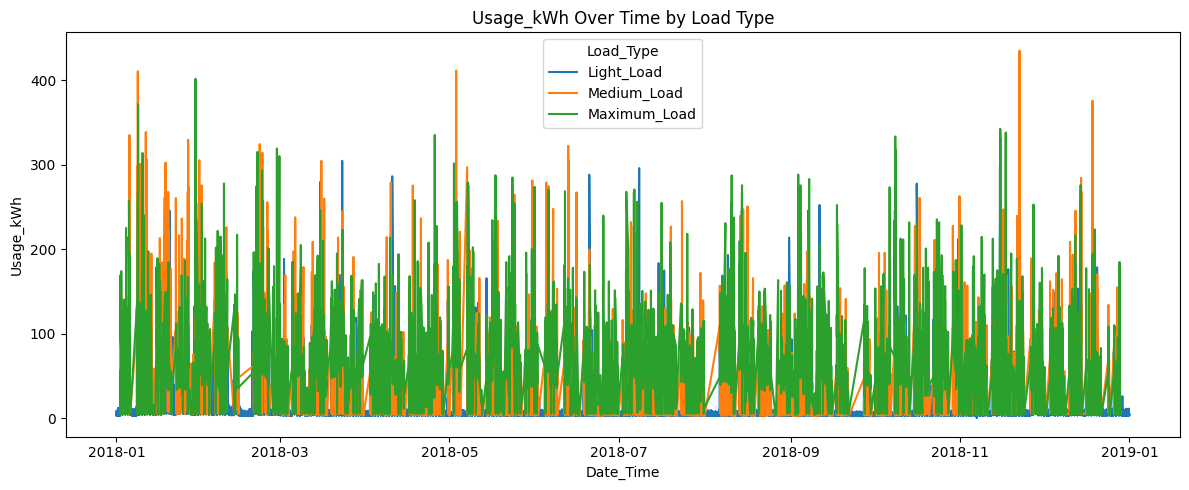

In [11]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'],dayfirst=True)

plt.figure(figsize=(12,5))
sns.lineplot(data=df,x='Date_Time', y='Usage_kWh', hue='Load_Type')
plt.title('Usage_kWh Over Time by Load Type')
plt.tight_layout()
plt.show()

In [12]:
df.drop(columns=['Date_Time'], inplace=True)


# Splitting into train and test data

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X.shape

(35041, 7)

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
y

array([0, 0, 0, ..., 0, 0, 0], shape=(35041,))

In [17]:
X_tr , X_te , y_tr , y_te = train_test_split(X,y,test_size=0.25,random_state=42)

# Feature Scaling

In [18]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)

# Model Training, Testing and Evaluation

In [25]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_tr, y_tr)                 
    y_pred = model.predict(X_te)         
    acc = accuracy_score(y_te, y_pred)  

    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_te, y_pred, target_names=le.classes_))


Model: Naive Bayes
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

  Light_Load       0.77      0.88      0.82      4501
Maximum_Load       0.50      0.74      0.60      1862
 Medium_Load       0.58      0.20      0.30      2398

    accuracy                           0.67      8761
   macro avg       0.62      0.61      0.57      8761
weighted avg       0.66      0.67      0.63      8761

Model: Random Forest
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

  Light_Load       0.96      0.96      0.96      4501
Maximum_Load       0.77      0.77      0.77      1862
 Medium_Load       0.77      0.78      0.78      2398

    accuracy                           0.87      8761
   macro avg       0.83      0.84      0.84      8761
weighted avg       0.87      0.87      0.87      8761

Model: Decision Tree
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

  Light_